# Credit Risk Prediction

### In this project we're trying to predict if a perosn is going to be a defaulter or not?

Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score #will be used with SVC

%matplotlib inline 

Reading the DataSet

In [2]:
df = pd.read_csv(r'bankloans.csv')

In [3]:
df.head()   

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.isnull().sum() #to find all null values in all cols

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [5]:
df.value_counts() #to see the total number of values

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [6]:
df = df.dropna()  #will drop all the nulls in dataset

In [7]:
#lets see rekatob between cols using visulization

<AxesSubplot:xlabel='age', ylabel='income'>

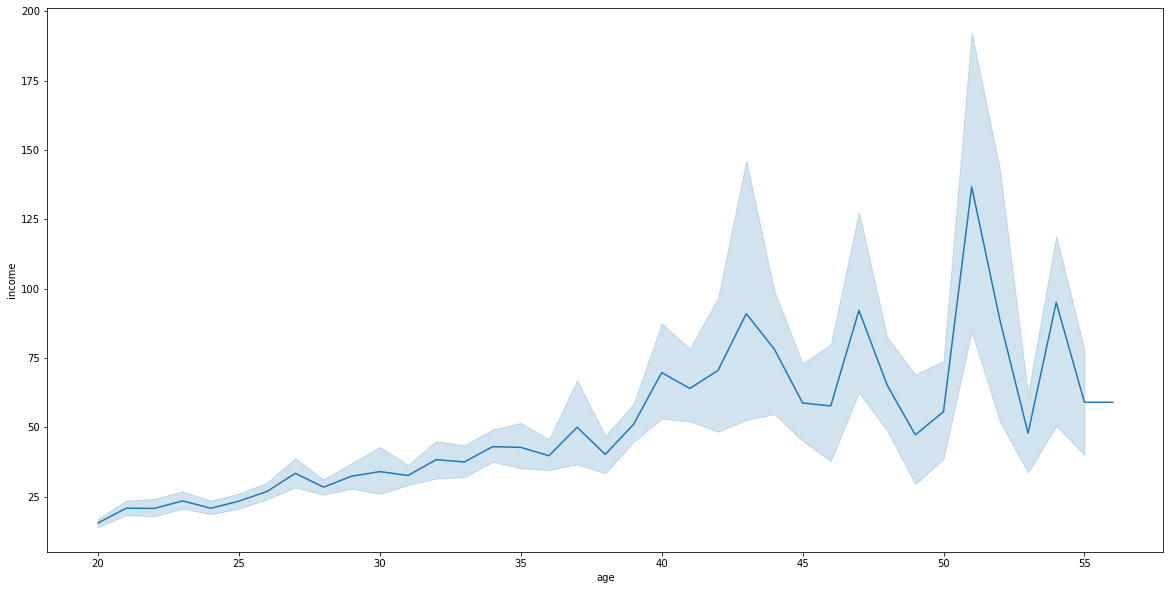

In [8]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='income', data=df, ax=ax)

<AxesSubplot:xlabel='age', ylabel='debtinc'>

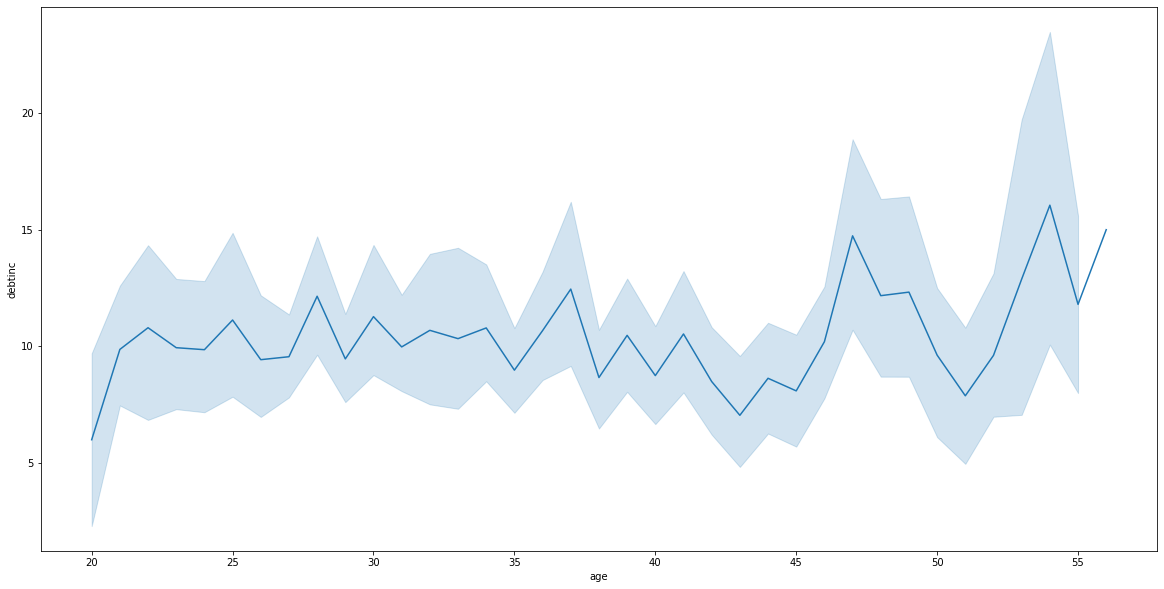

In [9]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc', data=df, ax=ax)

In [10]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

Creating training and test Datasets

In [11]:
x = df.drop(['default'],axis=1) #x will be everything except default col axis =1 is cols
y = df['default']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)  #random test ensure it says it is normal distribution

In [13]:
# we want to scale all the value to avoid baisness
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

#### Creating the ML Model

Random Forest Model

In [14]:
rf = RandomForestClassifier(n_estimators=200)  #create 200 trees

In [15]:
#we want to fit those data 
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [16]:
#predict the score - what is the testing value 
rf.score(xtest,ytest)

0.8071428571428572

In [17]:
#using cross validation scores to ensure our model works well ~ taking mean of abpve and geting optimal scores
rf1 = cross_val_score(estimator=rf,X=xtrain,y=ytrain,cv=10)
rf1.mean()

0.7857142857142857

Support Vector Machine 

In [18]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [19]:
sv.score(xtest,ytest)

0.7928571428571428

In [20]:
#sv uses a lot of hyperparameters so we select the best ones 
model = GridSearchCV(sv,{
    'C' : [0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],    #we need to know which one of these give best model result
    'gamma' : [0.1,0.8,1.0,2.0,3.0],
    'kernel' : ['rbf', 'linear']
},scoring = 'accuracy', cv = 10)

In [21]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [22]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [23]:
model1 = SVC(C=0.1,gamma=0.1,kernel='linear')
model1.fit(xtrain,ytrain)
model1.score(xtest,ytest)

0.8214285714285714

Logistic Regression

In [24]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

<AxesSubplot:>

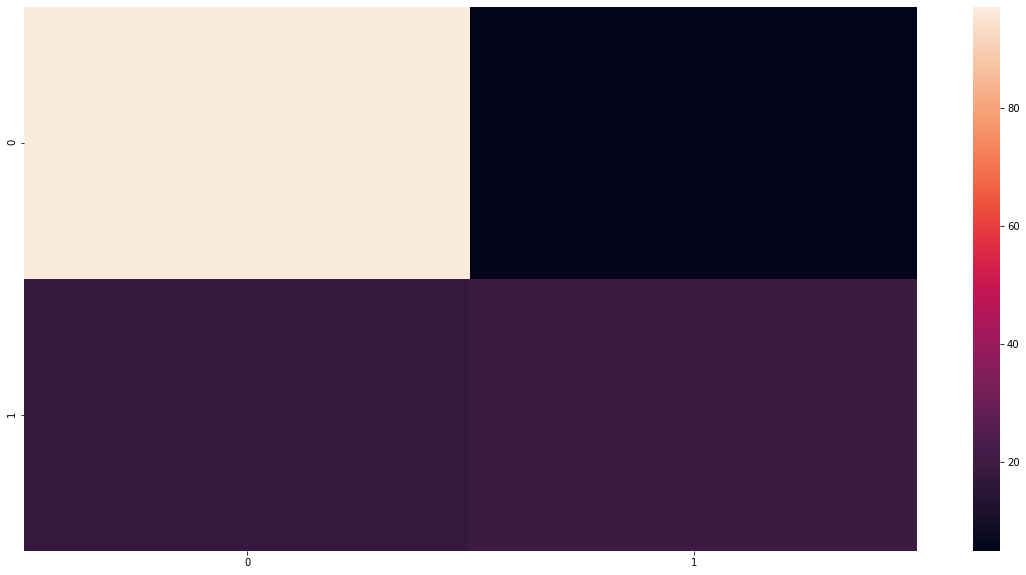

In [25]:
yp = lr.predict(xtest)
c = confusion_matrix(ytest,yp)
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(c,ax=ax)